# ImageDataGenerator

- `ImageDataGenerator`는 TensorFlow에서 제공하는 Class로

	이미지를 불러오는 동시에 여러 가지 전처리를 미리 구현하고 있어 이를 쉽게 사용 가능하도록 해준다.

- 데이터를 불러오는 동시에 여러가지 전처리를 쉽게 구현 할 수 있는 tf.keras의 기능!

In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Augmentation

- 데이터 증강 기법 : 이미지 회전, Shift 이동, 반전 등

- 데이터 증강 기법을 사용하는 이유는 과적합(Overfitting)을 방지하기 위해서 이다.

- `ImageDataGenerator`를 통해 이러한 전처리를 할 수 있다.

In [3]:
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
# horizontal_flip: 가로 반전
# 위 설정들을 랜덤으로 이미지에 적용시켜 준다.

### flow

- 데이터를 모두 메모리에 불러두고 사용 할 때

In [4]:
class Cifar10DataLoader():
    def __init__(self):
        # data load
        (self.train_x, self.train_y), \
            (self.test_x, self.test_y) = tf.keras.datasets.cifar10.load_data()
        self.input_shape = self.train_x.shape[1:]

    def scale(self, x):

        return (x / 255.0).astype(np.float32)

    def preprocess_dataset(self, dataset):

        (feature, target) = dataset

        # scaling #
        scaled_x = np.array([self.scale(x) for x in feature])

        # label encoding #
        ohe_y = np.array([tf.keras.utils.to_categorical(y, num_classes=10) for y in target])

        return scaled_x, ohe_y.squeeze(1)

    def get_train_dataset(self):
        return self.preprocess_dataset((self.train_x, self.train_y))

    def get_test_dataset(self):
        return self.preprocess_dataset((self.test_x, self.test_y))

cifar10_loader = Cifar10DataLoader()
train_x, train_y = cifar10_loader.get_train_dataset()

print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) float32
(50000, 10) float32


In [5]:
data_gen.flow((train_x, train_y)) #--> Generator

In [6]:
next(iter(data_gen.flow((train_x, train_y))))

[array([[[[0.14297658, 0.14297658, 0.14297658],
          [0.05719685, 0.05719685, 0.05719685],
          [0.05311213, 0.05311213, 0.05311213],
          ...,
          [0.01197109, 0.01197109, 0.01197109],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314]],
 
         [[0.11800455, 0.11800455, 0.11800455],
          [0.05541313, 0.05541313, 0.05541313],
          [0.05578771, 0.05578771, 0.05578771],
          ...,
          [0.01018737, 0.01018737, 0.01018737],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314]],
 
         [[0.09303252, 0.09303252, 0.09303252],
          [0.05362941, 0.05362941, 0.05362941],
          [0.05846328, 0.05846328, 0.05846328],
          ...,
          [0.00840366, 0.00840366, 0.00840366],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314]],
 
         ...,
 
         [[0.39110628, 0.37061244, 0.37493402],
          [0.35682

In [7]:
result = next(iter(data_gen.flow((train_x, train_y))))
x, y = result
x.shape, y.shape

((32, 32, 32, 3), (32, 10))

0.0 1.0 0.44969103
(32, 32, 3) [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


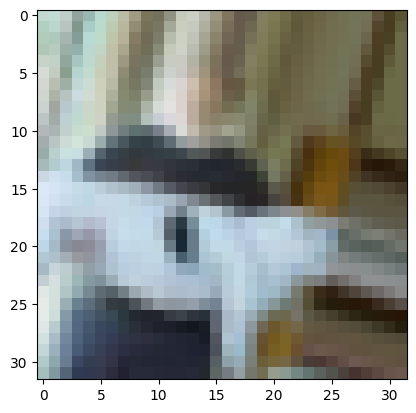

In [13]:
# 이코드를 여러번 실행해보면서 바뀌는 걸 한번 보세요! 데이터가 바뀌어서 출력되지요?

result = next(iter(data_gen.flow((train_x, train_y))))

x, y = result
print(np.min(x), np.max(x), np.mean(x))
print(x[0].shape, y[0])

# plt.imshow(x[0, :, :, 0], 'gray')
plt.imshow(x[0])
plt.show()

(1, 32, 32, 3)
0.028679134 0.9921947 0.42695674
(32, 32, 3) [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


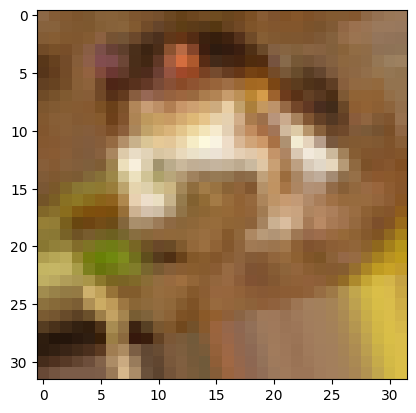

In [20]:
# 이코드를 여러번 실행해보면서 바뀌는 걸 한번 보세요! 같은 그림인데 자꾸 바뀌죠??

x = next(iter(data_gen.flow(train_x[:1])))
print(x.shape)

# print(np.min(result), np.max(result), np.mean(result))
print(np.min(x), np.max(x), np.mean(x))
print(x[0].shape, y[0])

# plt.imshow(x[0, :, :, 0], 'gray')
plt.imshow(x[0])
plt.show()

### flow_from_directory

- 대부분 다중 클래스로 Labeling 된 분류 문제에 사용된다.

- 데이터의 Label을 해당 데이터가 속한 폴더 이름으로 하겠다는 약속이 필요하다.

In [4]:
train_dir = "D:/zbDS/Project/Part8_DL/_dataset/mnist_png/training"
os.listdir(train_dir)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
input_shape = (28, 28, 1)
batch_size = 32

In [6]:
data_gen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    color_mode='grayscale' #--> 3채널이면 'rgb', 4채널이면 'rgba'
)

Found 60000 images belonging to 10 classes.


In [7]:
gen = data_gen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 60000 images belonging to 10 classes.


In [8]:
x, y = next(iter(gen))

In [9]:
print(x.shape)
print(y.shape)

(32, 28, 28, 1)
(32, 10)


### flow_from_DataFrame

In [10]:
import pandas as pd

In [11]:
os.listdir("D:/zbDS/Project/Part8_DL/_dataset/cifar")

['labels.txt', 'test', 'test_dataset.csv', 'train', 'train_dataset.csv']

In [12]:
train_data = pd.read_csv("D:/zbDS/Project/Part8_DL/_dataset/cifar/train_dataset.csv")
train_data

,path,class_name
0,../../datasets/cifar/train/32270_deer.png,deer
1,../../datasets/cifar/train/21851_cat.png,cat
2,../../datasets/cifar/train/48309_deer.png,deer
3,../../datasets/cifar/train/33547_truck.png,truck
4,../../datasets/cifar/train/45202_automobile.png,automobile
...,...,...
49995,../../datasets/cifar/train/24599_horse.png,horse
49996,../../datasets/cifar/train/38514_automobile.png,automobile
49997,../../datasets/cifar/train/20054_deer.png,deer
49998,../../datasets/cifar/train/25602_bird.png,bird


In [17]:
train_data['path'][0]

'../../datasets/cifar/train/32270_deer.png'

In [18]:
train_data['path'][0].replace("../../datasets", "D:/zbDS/Project/Part8_DL/_dataset")

'D:/zbDS/Project/Part8_DL/_dataset/cifar/train/32270_deer.png'

In [22]:
train_data['path'].map(lambda x: x.replace("../../datasets", "D:/zbDS/Project/Part8_DL/_dataset"))

0        D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
1        D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
2        D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
3        D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
4        D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
                               ...                        
49995    D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
49996    D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
49997    D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
49998    D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
49999    D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...
Name: path, Length: 50000, dtype: object

In [23]:
train_data['path'] = train_data['path'].map(lambda x: x.replace("../../datasets", "D:/zbDS/Project/Part8_DL/_dataset"))
train_data

,path,class_name
0,D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...,deer
1,D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...,cat
2,D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...,deer
3,D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...,truck
4,D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...,automobile
...,...,...
49995,D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...,horse
49996,D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...,automobile
49997,D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...,deer
49998,D:/zbDS/Project/Part8_DL/_dataset/cifar/train/...,bird


In [24]:
gen = data_gen.flow_from_dataframe(
    train_data,
    x_col="path",
    y_col="class_name",
    target_size=(32, 32),
    color_mode="rgb",
    class_model="categorical",
    batch_size=32
)

Found 50000 validated image filenames belonging to 10 classes.


In [25]:
gen

In [26]:
x, y = next(iter(gen))

In [27]:
print(x.shape)
print(y.shape)

(32, 32, 32, 3)
(32, 10)


#### - 학습

In [28]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add

def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2,
                 padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net = Add()([net1_1, net3])

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net = Add()([net, net3])

    net = MaxPool2D()(net)

    net = Flatten()(net)
    net = Dense(10, activation="softmax")(net)

    model = tf.keras.Model(inputs=inputs, outputs=net, name='resnet')

    return model

model = build_resnet((32, 32, 3))
model.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 32)           896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 8, 8, 64)             2112      ['max_pooling2d[0][0]']  

In [29]:
learning_rate = 0.03
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

In [30]:
model.fit(gen)

1563/1563 [==============================] - 303s 193ms/step - loss: 5.3293 - accuracy: 0.0998
